# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress
from pprint import pprint 
#import openweathermapy as owm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#import Json
import json

#import gkey

from api_keys import g_key
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [21]:
# import API Key from config file
#from api_keys import weather_api_key
# Create settings dictionary with information we're interested in
#settings = {"units": "imperial", "appid": api_keys}

# Initialize data frame to store data from API calls
#WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                   # "Date", "Max Temp", "Wind Speed", 
                                   # "Lat","Lng", "Humidity"])

In [22]:
#set varibles for each item collected from call to be appended to list
temperature = []
humidity = []
cloudiness = []
wind_speed = []
long = []
lati = []
city_name = []
country= []

#create loop to iterate through cities and pull data for set variables
for city in cities:
    #begin api call for weather
    #include try/except for any errors if any
    try:
        url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
        response = requests.get(url)
        response_json = response.json()
        pprint(response_json)
        #get data to append to each variable
        temperature.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        long.append(response_json["coord"]["lon"])
        lati.append(response_json["coord"]["lat"])
        city_name.append(response_json["name"])
        country.append(response_json["sys"]["country"])
        
                
        
        
        print(f"{city} is found")
    except:
        print("city not found")
        
    #sleep not to overload api call
    time.sleep(1)
    print()
        

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 61.2767, 'lon': 108.0108},
 'dt': 1651963139,
 'id': 2012956,
 'main': {'feels_like': 21.36,
          'grnd_level': 963,
          'humidity': 84,
          'pressure': 997,
          'sea_level': 997,
          'temp': 32.74,
          'temp_max': 32.74,
          'temp_min': 32.74},
 'name': 'Yerbogachën',
 'sys': {'country': 'RU', 'sunrise': 1651954804, 'sunset': 1652015332},
 'timezone': 28800,
 'visibility': 8418,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 241, 'gust': 32.95, 'speed': 18.57}}
yerbogachen is found

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1651963140,
 'id': 4030556,
 'main': {'feels_like': 78.33,
          'grnd_level': 1012,
          'humidity': 84,
          'pressure': 1015,
          'sea_level': 1015,
   


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -46.2817, 'lon': 169.8464},
 'dt': 1651963165,
 'id': 2208248,
 'main': {'feels_like': 54.39,
          'grnd_level': 1013,
          'humidity': 94,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 54.79,
          'temp_max': 54.79,
          'temp_min': 54.79},
 'name': 'Kaitangata',
 'rain': {'1h': 1.57},
 'sys': {'country': 'NZ', 'sunrise': 1651952771, 'sunset': 1651987685},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 239, 'gust': 2.17, 'speed': 1.5}}
kaitangata is found

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -42.8794, 'lon': 147.3294},
 'dt': 1651963147,
 'id': 2163355,
 'main': {'feels_like': 49.91,
          'humidity': 83,
          'pressure': 1015,
          'temp': 51.19,
          'temp_ma


{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 66.1451, 'lon': -65.7125},
 'dt': 1651963185,
 'id': 6096551,
 'main': {'feels_like': 19.67,
          'grnd_level': 1011,
          'humidity': 84,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 19.67,
          'temp_max': 19.67,
          'temp_min': 19.67},
 'name': 'Pangnirtung',
 'sys': {'country': 'CA', 'sunrise': 1651907662, 'sunset': 1651973064},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 14, 'gust': 2.59, 'speed': 2.21}}
pangnirtung is found

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -21.2, 'lon': -175.2},
 'dt': 1651963187,
 'id': 4032243,
 'main': {'feels_like': 78.24,
          'humidity': 78,
          'pressure': 1014,
          'temp': 77.16,
          'temp_max': 77.16,
          't


{'base': 'stations',
 'clouds': {'all': 57},
 'cod': 200,
 'coord': {'lat': -22.6667, 'lon': 167.4833},
 'dt': 1651962738,
 'id': 2137773,
 'main': {'feels_like': 73.58,
          'grnd_level': 1011,
          'humidity': 61,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 73.65,
          'temp_max': 73.65,
          'temp_min': 73.65},
 'name': 'Vao',
 'sys': {'country': 'NC', 'sunrise': 1651950723, 'sunset': 1651990868},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 93, 'gust': 19.04, 'speed': 16.8}}
vao is found

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 36.4891, 'lon': 36.2233},
 'dt': 1651963206,
 'id': 321572,
 'main': {'feels_like': 51.96,
          'humidity': 67,
          'pressure': 1014,
          'temp': 53.74,
          'temp_max': 53.74,
          'temp_min': 53.74


{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -42.7826, 'lon': 147.0587},
 'dt': 1651963224,
 'id': 2155415,
 'main': {'feels_like': 48.34,
          'humidity': 75,
          'pressure': 1018,
          'temp': 50.11,
          'temp_max': 53.1,
          'temp_min': 48.88},
 'name': 'New Norfolk',
 'sys': {'country': 'AU',
         'id': 2031307,
         'sunrise': 1651957737,
         'sunset': 1651993656,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 262, 'gust': 10.4, 'speed': 2.98}}
new norfolk is found

{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': 67.667, 'lon': 12.6934},
 'dt': 1651963049,
 'id': 3137469,
 'main': {'feels_like': 21.36,
          'grnd_level': 1014,
          'humidity': 61,
          'pressure': 1015,
          'sea_level': 1015,
  


{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 35.55, 'lon': 133.2333},
 'dt': 1651963243,
 'id': 1853174,
 'main': {'feels_like': 57.31,
          'humidity': 58,
          'pressure': 1020,
          'temp': 58.98,
          'temp_max': 58.98,
          'temp_min': 58.93},
 'name': 'Sakaiminato',
 'sys': {'country': 'JP',
         'id': 8028,
         'sunrise': 1651954128,
         'sunset': 1652003902,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 16.11}}
sakaiminato is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -33.5906, 'lon': 26.891},
 'dt': 1651963247,
 'id': 964432,
 'main': {'feels_like': 62.73,
          'humidity': 75,
          'pressure': 1020,
          'temp': 63.18,
          'temp_max': 63.18,
          'temp_min': 63


{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 7.5264, 'lon': -12.505},
 'dt': 1651963268,
 'id': 2409914,
 'main': {'feels_like': 79.57,
          'grnd_level': 1012,
          'humidity': 86,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 79.57,
          'temp_max': 79.57,
          'temp_min': 79.57},
 'name': 'Bonthe',
 'rain': {'1h': 3.1},
 'sys': {'country': 'SL', 'sunrise': 1651905234, 'sunset': 1651949953},
 'timezone': 0,
 'visibility': 3800,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 236, 'gust': 11.77, 'speed': 7}}
bonthe is found

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': -37.6167, 'lon': -73.65},
 'dt': 1651963269,
 'id': 3883457,
 'main': {'feels_like': 52.86,
          'grnd_level': 1014,
          'humidity': 90,
          'pressure': 1017,
          'sea_level': 1017,
      


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 16.8634, 'lon': -99.8901},
 'dt': 1651963015,
 'id': 3533462,
 'main': {'feels_like': 90.52,
          'humidity': 70,
          'pressure': 1007,
          'temp': 84.02,
          'temp_max': 84.02,
          'temp_min': 84.02},
 'name': 'Acapulco de Juárez',
 'sys': {'country': 'MX',
         'id': 7103,
         'sunrise': 1651925480,
         'sunset': 1651971651,
         'type': 1},
 'timezone': -18000,
 'visibility': 8047,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 9.22}}
acapulco is found

{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': 54.7183, 'lon': 135.315},
 'dt': 1651963289,
 'id': 2025256,
 'main': {'feels_like': 31.55,
          'grnd_level': 1015,
          'humidity': 71,
          'pressure': 1016,
          'sea_level': 1016,
          'tem


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 41.3712, 'lon': -73.414},
 'dt': 1651963310,
 'id': 5282297,
 'main': {'feels_like': 42.48,
          'humidity': 71,
          'pressure': 1012,
          'temp': 46.89,
          'temp_max': 51.89,
          'temp_min': 43.39},
 'name': 'Bethel',
 'rain': {'1h': 0.18},
 'sys': {'country': 'US',
         'id': 2004826,
         'sunrise': 1651916608,
         'sunset': 1651967815,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 60, 'gust': 18.41, 'speed': 9.22}}
bethel is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -46.1333, 'lon': 167.6833},
 'dt': 1651963018,
 'id': 2180815,
 'main': {'feels_like': 56.73,
          'grnd_level': 1011,
          'humidity': 97,
          'pressure': 1013,
          'sea_level


{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': -14.6122, 'lon': -41.1356},
 'dt': 1651963332,
 'id': 3472298,
 'main': {'feels_like': 77.16,
          'grnd_level': 973,
          'humidity': 64,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 76.78,
          'temp_max': 76.78,
          'temp_min': 76.78},
 'name': 'Anagé',
 'sys': {'country': 'BR', 'sunrise': 1651913735, 'sunset': 1651955195},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 123, 'gust': 21.5, 'speed': 9.08}}
anage is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.9661, 'lon': 74.9047},
 'dt': 1651963334,
 'id': 1258708,
 'main': {'feels_like': 78.71,
          'grnd_level': 975,
          'humidity': 22,
          'pressure': 1002,
          'sea_level': 1002,
          'temp': 7


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 22.0752, 'lon': -159.319},
 'dt': 1651963357,
 'id': 5848280,
 'main': {'feels_like': 78.44,
          'humidity': 76,
          'pressure': 1022,
          'temp': 77.43,
          'temp_max': 82.38,
          'temp_min': 76.48},
 'name': 'Kapaa',
 'sys': {'country': 'US',
         'id': 2001562,
         'sunrise': 1651939300,
         'sunset': 1651986356,
         'type': 2},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 18.41}}
kapaa is found

{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': -20.0064, 'lon': 57.6608},
 'dt': 1651963359,
 'id': 934479,
 'main': {'feels_like': 78.21,
          'humidity': 72,
          'pressure': 1016,
          'temp': 77.38,
          'temp_max': 77.38,
          'temp_min': 77.38},
 


{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 62.892, 'lon': 54.9635},
 'dt': 1651963083,
 'id': 471308,
 'main': {'feels_like': 35.38,
          'grnd_level': 991,
          'humidity': 90,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 40.17,
          'temp_max': 40.17,
          'temp_min': 40.17},
 'name': 'Voyvozh',
 'sys': {'country': 'RU', 'sunrise': 1651966796, 'sunset': 1652028802},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 202, 'gust': 25.12, 'speed': 6.93}}
voyvozh is found

{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': 38.5167, 'lon': -28.7},
 'dt': 1651963377,
 'id': 3372707,
 'main': {'feels_like': 60.66,
          'grnd_level': 1026,
          'humidity': 63,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': 6


{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': 54.8377, 'lon': 75.0834},
 'dt': 1651963395,
 'id': 1496329,
 'main': {'feels_like': 29.86,
          'grnd_level': 1017,
          'humidity': 47,
          'pressure': 1031,
          'sea_level': 1031,
          'temp': 35.91,
          'temp_max': 35.91,
          'temp_min': 35.91},
 'name': 'Okoneshnikovo',
 'sys': {'country': 'RU', 'sunrise': 1651964785, 'sunset': 1652021156},
 'timezone': 21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 237, 'gust': 12.97, 'speed': 7.56}}
okoneshnikovo is found

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': 38.3508, 'lon': 28.5172},
 'dt': 1651963397,
 'id': 324172,
 'main': {'feels_like': 54.18,
          'grnd_level': 992,
          'humidity': 62,
          'pressure': 1018,
          'sea_level': 1018,
          


{'cod': '404', 'message': 'city not found'}
city not found

{'cod': '404', 'message': 'city not found'}
city not found

{'base': 'stations',
 'clouds': {'all': 55},
 'cod': 200,
 'coord': {'lat': -8.9266, 'lon': 125.4092},
 'dt': 1651963420,
 'id': 1651810,
 'main': {'feels_like': 63.1,
          'grnd_level': 857,
          'humidity': 90,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 62.89,
          'temp_max': 62.89,
          'temp_min': 62.89},
 'name': 'Airai',
 'sys': {'country': 'TL', 'sunrise': 1651959741, 'sunset': 1652002044},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 119, 'gust': 9.04, 'speed': 4.74}}
airai is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 36.2831, 'lon': 116.4453},
 'dt': 1651963422,
 'id': 1798632,
 'main': {'feels_like': 54.54,
          '


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 32.767, 'lon': 22.6367},
 'dt': 1651963442,
 'id': 87205,
 'main': {'feels_like': 64.44,
          'grnd_level': 1012,
          'humidity': 66,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 65.12,
          'temp_max': 65.12,
          'temp_min': 65.12},
 'name': 'Darnah',
 'sys': {'country': 'LY', 'sunrise': 1651980970, 'sunset': 1652030144},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 147, 'gust': 16.73, 'speed': 8.93}}
darnah is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.75, 'lon': 161.3},
 'dt': 1651963443,
 'id': 2126199,
 'main': {'feels_like': 23.45,
          'grnd_level': 1000,
          'humidity': 97,
          'pressure': 1000,
          'sea_level': 1000,
          'temp': 30.67,
    

 'sys': {'country': 'US',
         'id': 4747,
         'sunrise': 1651928735,
         'sunset': 1651978268,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'gust': 41.43, 'speed': 28.77}}
lompoc is found

{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {'lat': 18.8167, 'lon': 95.2167},
 'dt': 1651963462,
 'id': 1299154,
 'main': {'feels_like': 87.85,
          'grnd_level': 1002,
          'humidity': 67,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 83.14,
          'temp_max': 83.14,
          'temp_min': 83.14},
 'name': 'Prome',
 'sys': {'country': 'MM', 'sunrise': 1651964882, 'sunset': 1652011395},
 'timezone': 23400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds


{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': 19.75, 'lon': 10.25},
 'dt': 1651963482,
 'id': 2448083,
 'main': {'feels_like': 85.42,
          'grnd_level': 954,
          'humidity': 15,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 89.37,
          'temp_max': 89.37,
          'temp_min': 89.37},
 'name': 'Agadez',
 'sys': {'country': 'NE', 'sunrise': 1651898817, 'sunset': 1651945448},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'gust': 15.9, 'speed': 9.46}}
agadez is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.9167, 'lon': -109.1833},
 'dt': 1651963483,
 'id': 4019098,
 'main': {'feels_like': 87.24,
          'grnd_level': 1008,
          'humidity': 24,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 90.


{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 10.2849, 'lon': 22.7882},
 'dt': 1651963500,
 'id': 240210,
 'main': {'feels_like': 82.54,
          'grnd_level': 956,
          'humidity': 38,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 83.52,
          'temp_max': 83.52,
          'temp_min': 83.52},
 'name': 'Birao',
 'sys': {'country': 'CF', 'sunrise': 1651896559, 'sunset': 1651941689},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 227, 'gust': 2.64, 'speed': 2.33}}
birao is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -33.0153, 'lon': 27.9116},
 'dt': 1651963501,
 'id': 1006984,
 'main': {'feels_like': 61.88,
          'grnd_level': 1013,
          'humidity': 93,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 


{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 51.1196, 'lon': 9.1248},
 'dt': 1651963522,
 'id': 2953317,
 'main': {'feels_like': 51.33,
          'humidity': 82,
          'pressure': 1023,
          'temp': 52.52,
          'temp_max': 54.45,
          'temp_min': 52.52},
 'name': 'Bad Wildungen',
 'sys': {'country': 'DE',
         'id': 1829,
         'sunrise': 1651981467,
         'sunset': 1652036133,
         'type': 1},
 'timezone': 7200,
 'visibility': 7000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 5.75}}
bad wildungen is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -19.7281, 'lon': -50.1956},
 'dt': 1651963523,
 'id': 3460513,
 'main': {'feels_like': 67.78,
          'grnd_level': 963,
          'humidity': 51,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.0531, 'lon': 39.5131},
 'dt': 1651963544,
 'id': 556268,
 'main': {'feels_like': 27.18,
          'grnd_level': 996,
          'humidity': 97,
          'pressure': 999,
          'sea_level': 999,
          'temp': 36.21,
          'temp_max': 36.21,
          'temp_min': 36.21},
 'name': 'Ostrovnoy',
 'rain': {'1h': 0.16},
 'sys': {'country': 'RU', 'sunrise': 1651967123, 'sunset': 1652035891},
 'timezone': 10800,
 'visibility': 5259,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 242, 'gust': 24.63, 'speed': 14.43}}
ostrovnoy is found

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 42.9019, 'lon': 133.9064},
 'dt': 1651963545,
 'id': 2017658,
 'main': {'feels_like': 44.92,
          'grnd_level': 1007,
          'humidity': 54,
          'pressure': 1015,
          'sea_level': 1


{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': 32.6941, 'lon': 47.2679},
 'dt': 1651963563,
 'id': 136702,
 'main': {'feels_like': 69.35,
          'grnd_level': 986,
          'humidity': 27,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 71.26,
          'temp_max': 71.26,
          'temp_min': 71.26},
 'name': 'Dehlorān',
 'sys': {'country': 'IR', 'sunrise': 1651975070, 'sunset': 1652024222},
 'timezone': 16200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 325, 'gust': 10.09, 'speed': 8.68}}
dehloran is found

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 62.2266, 'lon': -6.589},
 'dt': 1651963565,
 'id': 2618795,
 'main': {'feels_like': 38.08,
          'grnd_level': 1023,
          'humidity': 81,
          'pressure': 1026,
          'sea_level': 1026,
          'temp


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.8945, 'lon': -23.7142},
 'dt': 1651963581,
 'id': 3414079,
 'main': {'feels_like': 36.12,
          'grnd_level': 1012,
          'humidity': 88,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 43.02,
          'temp_max': 43.02,
          'temp_min': 43.02},
 'name': 'Olafsvik',
 'rain': {'1h': 0.59},
 'sys': {'country': 'IS', 'sunrise': 1651898386, 'sunset': 1651962182},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 120, 'gust': 18.63, 'speed': 13.58}}
olafsvik is found

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 52.9599, 'lon': 4.7593},
 'dt': 1651963332,
 'id': 2757220,
 'main': {'feels_like': 44.74,
          'humidity': 78,
          'pressure': 1028,
          'temp': 49.68,
          'temp_max': 49.98,
 


{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord': {'lat': 30.2956, 'lon': 111.5047},
 'dt': 1651963599,
 'id': 1784554,
 'main': {'feels_like': 66.92,
          'grnd_level': 1008,
          'humidity': 77,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 66.9,
          'temp_max': 66.9,
          'temp_min': 66.9},
 'name': 'Zhicheng',
 'sys': {'country': 'CN', 'sunrise': 1651959916, 'sunset': 1652008543},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'gust': 7.92, 'speed': 3.11}}
zhicheng is found

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 17.8333, 'lon': 82.95},
 'dt': 1651963600,
 'id': 1274020,
 'main': {'feels_like': 85.87,
          'grnd_level': 1000,
          'humidity': 87,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 80.


{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 7.9986, 'lon': 124.2928},
 'dt': 1651963617,
 'id': 1701054,
 'main': {'feels_like': 74.95,
          'grnd_level': 930,
          'humidity': 87,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 73.78,
          'temp_max': 73.78,
          'temp_min': 73.78},
 'name': 'Marawi',
 'sys': {'country': 'PH', 'sunrise': 1651958760, 'sunset': 1652003561},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 33, 'gust': 4.27, 'speed': 1.83}}
marawi is found

{'base': 'stations',
 'clouds': {'all': 41},
 'cod': 200,
 'coord': {'lat': -9.8756, 'lon': -56.0861},
 'dt': 1651963513,
 'id': 6316343,
 'main': {'feels_like': 73.56,
          'grnd_level': 979,
          'humidity': 91,
          'pressure': 1012,
          'sea_level': 1012,
          'temp':


{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': 38.5473, 'lon': 28.6498},
 'dt': 1651963635,
 'id': 305810,
 'main': {'feels_like': 48.33,
          'grnd_level': 940,
          'humidity': 59,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 50.77,
          'temp_max': 50.77,
          'temp_min': 50.77},
 'name': 'Kula',
 'sys': {'country': 'TR', 'sunrise': 1651978843, 'sunset': 1652029385},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 79, 'gust': 5.23, 'speed': 5.46}}
kula is found

{'base': 'stations',
 'clouds': {'all': 10},
 'cod': 200,
 'coord': {'lat': 69.2167, 'lon': -51.1},
 'dt': 1651963637,
 'id': 3423146,
 'main': {'feels_like': 20.44,
          'humidity': 64,
          'pressure': 1009,
          'temp': 28.42,
          'temp_max': 28.42,
          'temp_min': 28.42},
 'name'


{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -7.3817, 'lon': 108.2082},
 'dt': 1651963654,
 'id': 1640902,
 'main': {'feels_like': 73.58,
          'grnd_level': 973,
          'humidity': 95,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 72.19,
          'temp_max': 72.19,
          'temp_min': 72.19},
 'name': 'Kawalu',
 'sys': {'country': 'ID', 'sunrise': 1651963755, 'sunset': 1652006286},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'gust': 2.51, 'speed': 2.55}}
kawalu is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -14.7972, 'lon': -57.2881},
 'dt': 1651963414,
 'id': 3456137,
 'main': {'feels_like': 69.66,
          'grnd_level': 992,
          'humidity': 62,
          'pressure': 1015,
          'sea_level': 1015,
          'temp':


{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': -35.3333, 'lon': -72.4167},
 'dt': 1651963673,
 'id': 3893726,
 'main': {'feels_like': 52.74,
          'grnd_level': 1013,
          'humidity': 80,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 53.89,
          'temp_max': 53.89,
          'temp_min': 53.89},
 'name': 'Constitución',
 'sys': {'country': 'CL', 'sunrise': 1651923088, 'sunset': 1651960856},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 203, 'gust': 14.81, 'speed': 10.85}}
constitucion is found

{'base': 'stations',
 'clouds': {'all': 22},
 'cod': 200,
 'coord': {'lat': 13.3607, 'lon': 121.8278},
 'dt': 1651963674,
 'id': 1700686,
 'main': {'feels_like': 87.73,
          'grnd_level': 1008,
          'humidity': 80,
          'pressure': 1010,
          'sea_level': 1010,
     


{'base': 'stations',
 'clouds': {'all': 39},
 'cod': 200,
 'coord': {'lat': 9.25, 'lon': 0.7833},
 'dt': 1651963692,
 'id': 2367568,
 'main': {'feels_like': 77.02,
          'grnd_level': 968,
          'humidity': 62,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 76.73,
          'temp_max': 76.73,
          'temp_min': 76.73},
 'name': 'Bassar',
 'sys': {'country': 'TG', 'sunrise': 1651901917, 'sunset': 1651946892},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'gust': 3.04, 'speed': 3.09}}
bassar is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -51.6226, 'lon': -69.2181},
 'dt': 1651963693,
 'id': 3838859,
 'main': {'feels_like': 48.61,
          'humidity': 40,
          'pressure': 989,
          'temp': 51.85,
          'temp_max': 51.85,
          'temp_min': 51.85}

 'sys': {'country': 'US',
         'id': 2009350,
         'sunrise': 1651928854,
         'sunset': 1651978849,
         'type': 2},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 309, 'gust': 31, 'speed': 18.01}}
pacific grove is found

{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': 40.1667, 'lon': 29.0833},
 'dt': 1651963700,
 'id': 750268,
 'main': {'feels_like': 35.78,
          'grnd_level': 956,
          'humidity': 79,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 39.24,
          'temp_max': 39.24,
          'temp_min': 39.24},
 'name': 'Bursa',
 'sys': {'country': 'TR',
         'id': 6982,
         'sunrise': 1651978526,
         'sunset': 1652029495,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '0


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 10.5, 'lon': 10},
 'dt': 1651963731,
 'id': 2347468,
 'main': {'feels_like': 83.23,
          'grnd_level': 949,
          'humidity': 56,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 81.61,
          'temp_max': 81.61,
          'temp_min': 81.61},
 'name': 'Bauchi',
 'sys': {'country': 'NG', 'sunrise': 1651899611, 'sunset': 1651944774},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'gust': 15.23, 'speed': 8.41}}
bauchi is found

{'cod': '404', 'message': 'city not found'}
city not found

{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 32.6881, 'lon': 128.8419},
 'dt': 1651963734,
 'id': 1863997,
 'main': {'feels_like': 63.81,
          'grnd_level': 1012,
          'humidity': 81,
          'pressure


{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': 51.8175, 'lon': 3.9806},
 'dt': 1651963752,
 'id': 2755485,
 'main': {'feels_like': 53.26,
          'humidity': 76,
          'pressure': 1026,
          'temp': 54.54,
          'temp_max': 55.98,
          'temp_min': 52.99},
 'name': 'Goedereede',
 'sys': {'country': 'NL',
         'id': 2007053,
         'sunrise': 1651982549,
         'sunset': 1652037520,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 52, 'gust': 8.99, 'speed': 3}}
goedereede is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.3223, 'lon': 42.7678},
 'dt': 1651963754,
 'id': 553766,
 'main': {'feels_like': 39.04,
          'grnd_level': 1009,
          'humidity': 54,
          'pressure': 1028,
          'sea_level': 1028,
          'temp': 42


{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.8043, 'lon': 67.7144},
 'dt': 1651963771,
 'id': 1516589,
 'main': {'feels_like': 39.81,
          'grnd_level': 980,
          'humidity': 31,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': 47.16,
          'temp_max': 47.16,
          'temp_min': 47.16},
 'name': 'Zhezkazgan',
 'sys': {'country': 'KZ', 'sunrise': 1651968071, 'sunset': 1652021407},
 'timezone': 21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 62, 'gust': 35.12, 'speed': 20.24}}
zhezkazgan is found

{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': 52.0108, 'lon': 86.5467},
 'dt': 1651963773,
 'id': 1507745,
 'main': {'feels_like': 35.96,
          'grnd_level': 993,
          'humidity': 93,
          'pressure': 1029,
          'sea_level': 1029,
        


{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 16.4145, 'lon': -3.6708},
 'dt': 1651963790,
 'id': 2456917,
 'main': {'feels_like': 88.47,
          'grnd_level': 980,
          'humidity': 16,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 92.66,
          'temp_max': 92.66,
          'temp_min': 92.66},
 'name': 'Goundam',
 'sys': {'country': 'ML', 'sunrise': 1651902431, 'sunset': 1651948517},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'gust': 12.53, 'speed': 8.63}}
goundam is found

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 58.2841, 'lon': 35.5158},
 'dt': 1651963792,
 'id': 535711,
 'main': {'feels_like': 44.58,
          'grnd_level': 998,
          'humidity': 88,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 48


{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 28.6585, 'lon': -17.9182},
 'dt': 1651963561,
 'id': 2514651,
 'main': {'feels_like': 63.46,
          'humidity': 68,
          'pressure': 1018,
          'temp': 64.15,
          'temp_max': 64.15,
          'temp_min': 64.15},
 'name': 'Los Llanos de Aridane',
 'sys': {'country': 'ES',
         'id': 2377,
         'sunrise': 1651904770,
         'sunset': 1651953015,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 10.36}}
los llanos de aridane is found

{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': -0.6833, 'lon': -80.1},
 'dt': 1651963811,
 'id': 3659139,
 'main': {'feels_like': 78.76,
          'grnd_level': 1004,
          'humidity': 89,
          'pressure': 1010,
          'sea_level': 1010,


{'base': 'stations',
 'clouds': {'all': 31},
 'cod': 200,
 'coord': {'lat': -0.8667, 'lon': 134.0833},
 'dt': 1651963773,
 'id': 1636308,
 'main': {'feels_like': 89.49,
          'grnd_level': 999,
          'humidity': 75,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 82.87,
          'temp_max': 82.87,
          'temp_min': 82.87},
 'name': 'Manokwari',
 'sys': {'country': 'ID', 'sunrise': 1651957066, 'sunset': 1652000556},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 137, 'gust': 11.43, 'speed': 7.52}}
manokwari is found

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 67.45, 'lon': 153.6833},
 'dt': 1651963829,
 'id': 2121025,
 'main': {'feels_like': 17.06,
          'grnd_level': 1003,
          'humidity': 83,
          'pressure': 1006,
          'sea_level': 1006,
        


{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 18.4167, 'lon': -64.6167},
 'dt': 1651963846,
 'id': 3577430,
 'main': {'feels_like': 84.42,
          'humidity': 74,
          'pressure': 1016,
          'temp': 80.53,
          'temp_max': 80.69,
          'temp_min': 78.01},
 'name': 'Road Town',
 'sys': {'country': 'VG',
         'id': 8799,
         'sunrise': 1651916890,
         'sunset': 1651963310,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 10.36}}
road town is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.5011, 'lon': -165.4064},
 'dt': 1651963847,
 'id': 5870133,
 'main': {'feels_like': 22.14,
          'humidity': 93,
          'pressure': 1014,
          'temp': 32.07,
          'temp_max': 33.17,
          'temp_min':


{'cod': '404', 'message': 'city not found'}
city not found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.0205, 'lon': -93.218},
 'dt': 1651963866,
 'id': 5044290,
 'main': {'feels_like': 71.29,
          'humidity': 27,
          'pressure': 1009,
          'temp': 73.02,
          'temp_max': 74.28,
          'temp_min': 70.75},
 'name': 'Saint Anthony',
 'sys': {'country': 'US',
         'id': 2009535,
         'sunrise': 1651920813,
         'sunset': 1651973115,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160, 'gust': 41.43, 'speed': 20.71}}
saint anthony is found

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -27.4257, 'lon': 29.1659},
 'dt': 1651963868,
 'id': 942701,
 'main': {'feels_like': 47.52,
          'grnd_level': 835,
          'humidity': 47,
 


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.9555, 'lon': 34.5793},
 'dt': 1651963890,
 'id': 551145,
 'main': {'feels_like': 32.74,
          'grnd_level': 1002,
          'humidity': 89,
          'pressure': 1004,
          'sea_level': 1004,
          'temp': 39.09,
          'temp_max': 39.09,
          'temp_min': 39.09},
 'name': "Kem'",
 'sys': {'country': 'RU', 'sunrise': 1651970580, 'sunset': 1652034803},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 253, 'gust': 19.51, 'speed': 9.51}}
kem is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.2128, 'lon': -75.4557},
 'dt': 1651963891,
 'id': 5134295,
 'main': {'feels_like': 54.5,
          'humidity': 33,
          'pressure': 1013,
          'temp': 57.51,
          'temp_max': 58.37,
          'temp_min': 53.


{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 34.1628, 'lon': 113.4639},
 'dt': 1651963909,
 'id': 1785566,
 'main': {'feels_like': 57.36,
          'grnd_level': 1004,
          'humidity': 42,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 59.72,
          'temp_max': 59.72,
          'temp_min': 59.72},
 'name': 'Yingchuan',
 'sys': {'country': 'CN', 'sunrise': 1651959029, 'sunset': 1652008489},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 37, 'gust': 11.7, 'speed': 8.46}}
yuzhou is found

{'base': 'stations',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 20.931, 'lon': -17.0347},
 'dt': 1651963910,
 'id': 2377457,
 'main': {'feels_like': 64.94,
          'humidity': 94,
          'pressure': 1013,
          'temp': 64.38,
          'temp_max': 64.38,
          'temp_m


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 58.5169, 'lon': -117.136},
 'dt': 1651963928,
 'id': 5975004,
 'main': {'feels_like': 29.46,
          'humidity': 100,
          'pressure': 991,
          'temp': 37.51,
          'temp_max': 37.51,
          'temp_min': 37.51},
 'name': 'High Level',
 'rain': {'1h': 0.38},
 'sys': {'country': 'CA',
         'id': 867,
         'sunrise': 1651923507,
         'sunset': 1651981902,
         'type': 1},
 'timezone': -21600,
 'visibility': 9656,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 320, 'gust': 20.71, 'speed': 12.66}}
high level is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.2025, 'lon': 60.6848},
 'dt': 1651963930,
 'id': 1160939,
 'main': {'feels_like': 81.59,
          'grnd_level': 946,
          'humidity': 26,
          'pressure': 1008,
          'sea_leve


{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': 37.7167, 'lon': -25.4333},
 'dt': 1651963947,
 'id': 3372472,
 'main': {'feels_like': 66.88,
          'grnd_level': 1022,
          'humidity': 93,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 63.01},
 'name': 'Vila Franca do Campo',
 'sys': {'country': 'PT',
         'id': 37781,
         'sunrise': 1651905580,
         'sunset': 1651955813,
         'type': 2},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 39, 'gust': 2.73, 'speed': 0.98}}
vila franca do campo is found

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.8351, 'lon': -66.4792},
 'dt': 1651963949,
 'id': 6094407,
 'main': {'feels_like': 51.69,
          'humidity': 24,
          'pressure'


{'cod': '404', 'message': 'city not found'}
city not found

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 5.6, 'lon': 27.4667},
 'dt': 1651963968,
 'id': 366444,
 'main': {'feels_like': 70.72,
          'grnd_level': 940,
          'humidity': 92,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 69.73,
          'temp_max': 69.73,
          'temp_min': 69.73},
 'name': 'Tambura',
 'sys': {'country': 'SS', 'sunrise': 1651982175, 'sunset': 1652026621},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 333, 'gust': 5.14, 'speed': 3.47}}
tambura is found

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 30.4833, 'lon': -115.95},
 'dt': 1651963948,
 'id': 3984997,
 'main': {'feels_like': 64.33,
          'grnd_level': 1011,
          'humidity': 73,
          'pressur


{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': -9.8607, 'lon': 124.284},
 'dt': 1651963988,
 'id': 1626703,
 'main': {'feels_like': 70,
          'grnd_level': 917,
          'humidity': 87,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 69.28,
          'temp_max': 69.28,
          'temp_min': 69.28},
 'name': 'Soe',
 'sys': {'country': 'ID', 'sunrise': 1651960081, 'sunset': 1652002244},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 62, 'gust': 15.68, 'speed': 6.06}}
soe is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 44.8332, 'lon': 11.1426},
 'dt': 1651963990,
 'id': 3168389,
 'main': {'feels_like': 57.88,
          'grnd_level': 1016,
          'humidity': 89,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 58.19,
 

 'sys': {'country': 'US',
         'id': 6082,
         'sunrise': 1651919032,
         'sunset': 1651971249,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 5.75}}
traverse city is found

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -0.9492, 'lon': 100.3543},
 'dt': 1651964009,
 'id': 1633419,
 'main': {'feels_like': 79.23,
          'grnd_level': 1007,
          'humidity': 81,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 77.94,
          'temp_max': 77.94,
          'temp_min': 77.94},
 'name': 'Padang',
 'rain': {'1h': 1.54},
 'sys': {'country': 'ID', 'sunrise': 1651965167, 'sunset': 1652008644},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
             


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 21.3469, 'lon': -158.0858},
 'dt': 1651963923,
 'id': 5850554,
 'main': {'feels_like': 78.78,
          'humidity': 62,
          'pressure': 1021,
          'temp': 78.33,
          'temp_max': 79.12,
          'temp_min': 76.69},
 'name': 'Makakilo City',
 'sys': {'country': 'US',
         'id': 7868,
         'sunrise': 1651939068,
         'sunset': 1651985996,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 60, 'gust': 23.02, 'speed': 16.11}}
makakilo city is found

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 55.9333, 'lon': 23.3167},
 'dt': 1651964030,
 'id': 594739,
 'main': {'feels_like': 48.81,
          'humidity': 87,
          'pressure': 1019,
          'temp': 50.02,
          'temp_max': 50.02,
         


{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 62.5353, 'lon': 113.9611},
 'dt': 1651964048,
 'id': 2019951,
 'main': {'feels_like': 36.43,
          'humidity': 75,
          'pressure': 990,
          'temp': 39.24,
          'temp_max': 39.24,
          'temp_min': 39.24},
 'name': 'Mirny',
 'sys': {'country': 'RU',
         'id': 69381,
         'sunrise': 1651952833,
         'sunset': 1652014447,
         'type': 2},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'gust': 0, 'speed': 4}}
mirnyy is found

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 14.3122, 'lon': 121.1114},
 'dt': 1651964050,
 'id': 1687894,
 'main': {'feels_like': 92.14,
          'grnd_level': 1009,
          'humidity': 72,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 84


{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': -26.3592, 'lon': -52.8511},
 'dt': 1651964070,
 'id': 3448597,
 'main': {'feels_like': 54.01,
          'grnd_level': 921,
          'humidity': 91,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 54.57,
          'temp_max': 54.57,
          'temp_min': 54.57},
 'name': 'São Lourenço do Oeste',
 'sys': {'country': 'BR', 'sunrise': 1651917512, 'sunset': 1651957041},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 149, 'gust': 2.33, 'speed': 1.59}}
sao lourenco do oeste is found

{'base': 'stations',
 'clouds': {'all': 29},
 'cod': 200,
 'coord': {'lat': 57.2169, 'lon': 94.8978},
 'dt': 1651964072,
 'id': 1490058,
 'main': {'feels_like': 20.89,
          'grnd_level': 999,
          'humidity': 57,
          'pressure': 1015,
          'sea_


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 40.5153, 'lon': -107.5464},
 'dt': 1651964093,
 'id': 5576064,
 'main': {'feels_like': 57.7,
          'grnd_level': 803,
          'humidity': 75,
          'pressure': 1003,
          'sea_level': 1003,
          'temp': 58.62,
          'temp_max': 58.62,
          'temp_min': 55.38},
 'name': 'Craig',
 'sys': {'country': 'US',
         'id': 4340,
         'sunrise': 1651924911,
         'sunset': 1651975895,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 12, 'gust': 13.35, 'speed': 10.65}}
craig is found

{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 5.6667, 'lon': 73},
 'dt': 1651964095,
 'id': 1337619,
 'main': {'feels_like': 92.35,
          'grnd_level': 1006,
          'humidity': 70,
          'pressur

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#created DataFrame by using set varibles to create key:value pairs 

weather_df = pd.DataFrame({
    'city_name': city_name,
    'temperature': temperature, 
    'humidity': humidity, 
    'cloudiness': cloudiness, 
    'wind_speed': wind_speed, 
    'long': long,
    'lati': lati,
    'country' : country
    })
#print(temperature)
#print(city_name)

#export df to csv
weather_df.to_csv('weather.csv')
weather_df
print(weather_df)

          city_name  temperature  humidity  cloudiness  wind_speed      long  \
0       Yerbogachën        32.74        84          48       18.57  108.0108   
1           Rikitea        76.98        84          48       14.76 -134.9692   
2    Vestmannaeyjar        45.00        90         100       24.07  -20.2734   
3             Cabra        64.65        57          25        4.09   -4.4421   
4         Upernavik        14.61        82          11        6.31  -56.1549   
..              ...          ...       ...         ...         ...       ...   
567          Katobu        77.70        90         100        6.13  122.5276   
568        Araouane        87.51        11           0       12.88   -3.5265   
569          Rusape        57.76        79          75        5.50   32.1284   
570     La Asuncion        78.67        84          78       12.12  -63.8628   
571        Barcelos        67.84        71          70        3.98   -8.6151   

        lati country  
0    61.2767    

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
# check for cities with humidity >100%
weather_df[weather_df['humidity'] >100]

,city_name,temperature,humidity,cloudiness,wind_speed,long,lati,country


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

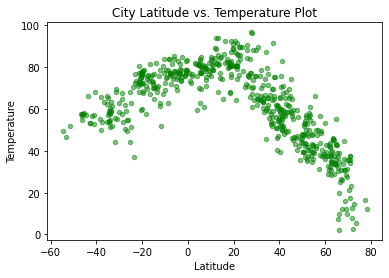

In [26]:
weather_df.plot.scatter(x= 'lati',
                        y= 'temperature',
                        color= 'green',
                        #edgecolors= 'black',
                        alpha= .5)

plt.title("City Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()


## Latitude vs. Humidity Plot

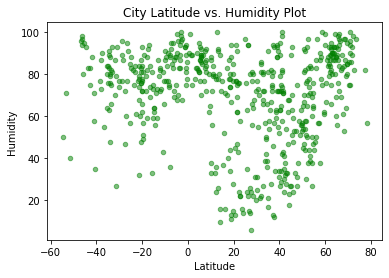

In [27]:
weather_df.plot.scatter(x= 'lati',
                        y= 'humidity',
                        color= 'green',
                        #edgecolors= 'black',
                        alpha= .5)

plt.title("City Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

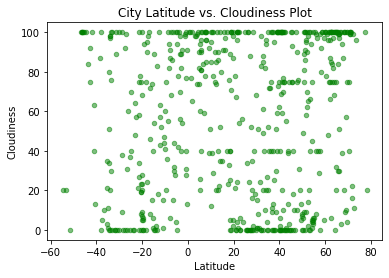

In [28]:
weather_df.plot.scatter(x= 'lati',
                        y= 'cloudiness',
                        color= 'green',
                        #edgecolors= 'black',
                        alpha= .5)

plt.title("City Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

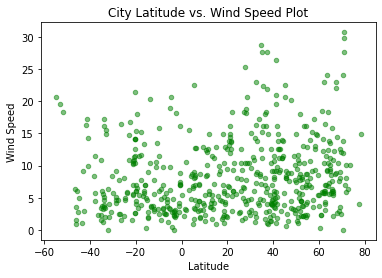

In [29]:
weather_df.plot.scatter(x= 'lati',
                        y= 'wind_speed',
                        color= 'green',
                        #edgecolors= 'black',
                        alpha= .5)

plt.title("City Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

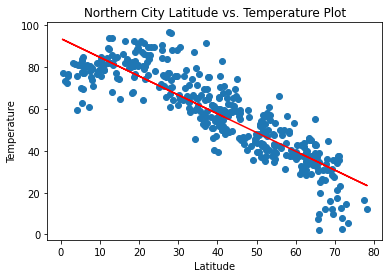

In [30]:
#northern is anything above equator 0 lati
northern_df= weather_df[weather_df['lati'] >0]

plt.scatter(northern_df['lati'],northern_df['temperature'])
m, b = np.polyfit(northern_df['lati'], northern_df['temperature'], 1)

plt.plot(northern_df['lati'], m*northern_df['lati'] + b, color = 'red')


plt.title("Northern City Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

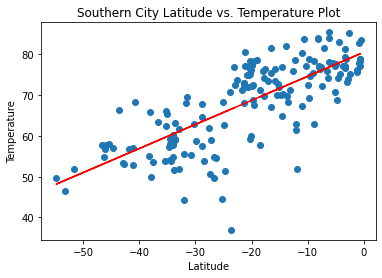

In [31]:
southern_df= weather_df[weather_df['lati'] <0]

plt.scatter(southern_df['lati'],southern_df['temperature'])
m, b = np.polyfit(southern_df['lati'],southern_df['temperature'], 1)
plt.plot(southern_df['lati'], m*southern_df['lati'] + b, color = 'red')


plt.title("Southern City Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

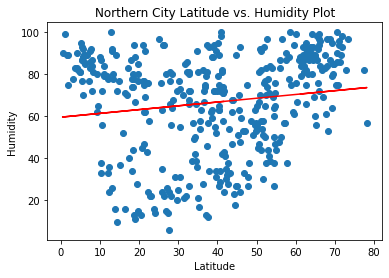

In [32]:
northern_df= weather_df[weather_df['lati'] >0]

plt.scatter(northern_df['lati'],northern_df['humidity'])
m, b = np.polyfit(northern_df['lati'], northern_df['humidity'], 1)

plt.plot(northern_df['lati'], m*northern_df['lati'] + b, color = 'red')


plt.title("Northern City Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

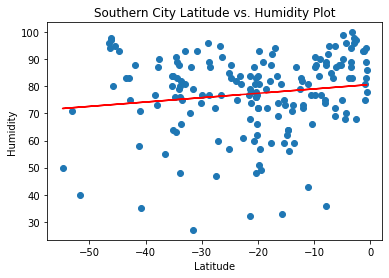

In [33]:
southern_df= weather_df[weather_df['lati'] <0]

plt.scatter(southern_df['lati'],southern_df['humidity'])
m, b = np.polyfit(southern_df['lati'],southern_df['humidity'], 1)
plt.plot(southern_df['lati'], m*southern_df['lati'] + b, color = 'red')


plt.title("Southern City Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

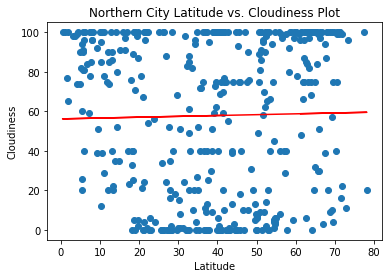

In [34]:
northern_df= weather_df[weather_df['lati'] >0]

plt.scatter(northern_df['lati'],northern_df['cloudiness'])
m, b = np.polyfit(northern_df['lati'], northern_df['cloudiness'], 1)

plt.plot(northern_df['lati'], m*northern_df['lati'] + b, color = 'red')


plt.title("Northern City Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

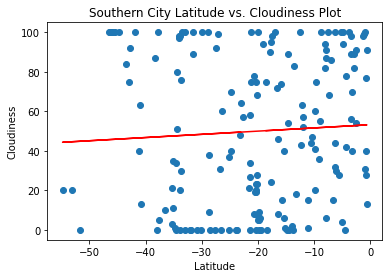

In [35]:
southern_df= weather_df[weather_df['lati'] <0]

plt.scatter(southern_df['lati'],southern_df['cloudiness'])
m, b = np.polyfit(southern_df['lati'],southern_df['cloudiness'], 1)
plt.plot(southern_df['lati'], m*southern_df['lati'] + b, color = 'red')


plt.title("Southern City Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

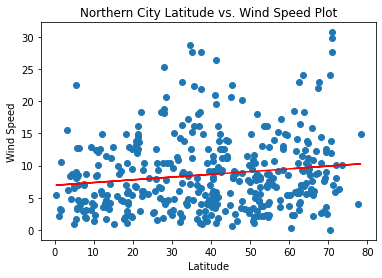

In [36]:
northern_df= weather_df[weather_df['lati'] >0]

plt.scatter(northern_df['lati'],northern_df['wind_speed'])
m, b = np.polyfit(northern_df['lati'], northern_df['wind_speed'], 1)

plt.plot(northern_df['lati'], m*northern_df['lati'] + b, color = 'red')


plt.title("Northern City Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

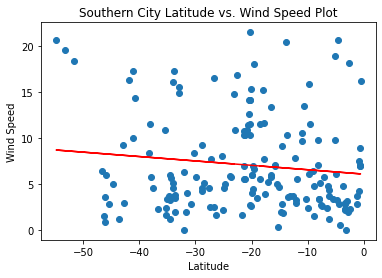

In [37]:
southern_df= weather_df[weather_df['lati'] <0]

plt.scatter(southern_df['lati'],southern_df['wind_speed'])
m, b = np.polyfit(southern_df['lati'],southern_df['wind_speed'], 1)

plt.plot(southern_df['lati'], m*southern_df['lati'] + b, color = 'red')


plt.title("Southern City Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()